<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Deep_Learning_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import  dataloader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [ ]:
#We set the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
#We load the training data 
train = datasets.FashionMNIST(
    root = "data",
    train = True,
    download =True,
    transform= ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10, dtype= torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [ ]:
#Load the test set 
test = datasets.FashionMNIST(
    root = "data", 
    download = True,
    train= False, 
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype =torch.float).scatter_(0,torch.tensor(y), value = 1))
    ) 

In [ ]:
#We can now iterate and visualize the dataset 
#We create a dictionary that maps the 10 classes to index values 
class_names = {
    0:"T-SHirt",
    1:"Trouser",
    2:"Pull-over",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle-Boot"
}

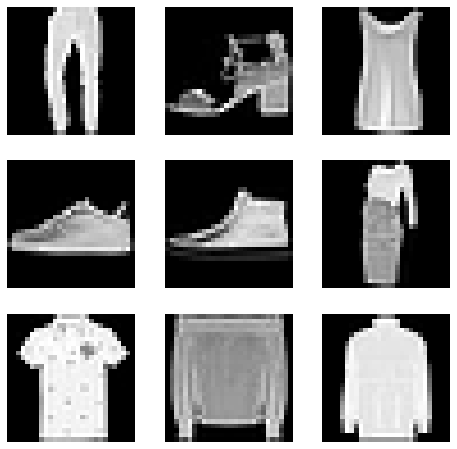

In [ ]:
figure = plt.figure(figsize=(8,8))
cols,rows = 3,3
for i in range(1,rows* cols+1):
  sample_idx = torch.randint(len(train), size=(1,)).item()
  img, label = train[sample_idx]
  figure.add_subplot(rows,cols,i)
  #plt.title(class_names[label])
  plt.axis("off")
  plt.imshow(img.squeeze(),cmap="gray")

In [ ]:
#Creating a custom dataset for our files
#import os
#import pandas
#from torchvision.io import read_image

#class CustomImageDataset(dataset):
 # def __init_(self, annotation_file, image_labels, image_dir,transform= None, target_transform= None):
  #  self.image_labels = pd.read_csv(annotation_file)

In [ ]:
#Build the neural network 
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten =  nn.Flatten()
    self.layers_relu = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )
  def forward(self,x): #Indentation error
      x = self.flatten(x)
      logits = self.layers_relu(x)
      return logits

In [ ]:
model = NeuralNetwork().to(device)

In [ ]:
x = torch.randn(1,28,28, device = device)
logits = model(x)
pred_probab = nn.Softmax(dim=1)(logits) #Prediction probability distribution
y_pred = pred_probab.argmax(1)#This function returns the argument with the maximum value from the probability distribution

In [ ]:
import torch

In [ ]:
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5,3, requires_grad=True) #requires_grad  tells pytorch these parameter requires it gradient to be calculated
b= torch.randn(3,requires_grad=True)
z = torch.matmul(x,w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y) #calculate the loss functions

In [ ]:
z.grad_fn


In [ ]:
print(f"Calculate:{z.grad_fn}")

Calculate:<AddBackward0 object at 0x7f8dae8017d0>


In [ ]:
#To compute the derivative of the loss with respect to specific parameters we 
#we call loss.backward()
loss.backward()

In [ ]:
#We the obtain the values calculated 
print(w.grad)
print(b.grad)
#We can only obtain the grad properties of the leaf nodes in our computational graph , for all other nodes in our graph this property will not be available

tensor([[0.3160, 0.1572, 0.0465],
        [0.3160, 0.1572, 0.0465],
        [0.3160, 0.1572, 0.0465],
        [0.3160, 0.1572, 0.0465],
        [0.3160, 0.1572, 0.0465]])
tensor([0.3160, 0.1572, 0.0465])


In [ ]:
#If we need to do several backward calls on the same graph  we need to pass in the retain_graph and set it to True to call a backward function

In [ ]:
z = torch.matmul(x,w) + b
print(z.requires_grad)

True


In [ ]:
with torch.no_grad():
  z = torch.matmul(x,w) +b
  print(z.requires_grad)

False


In [ ]:
#Another way to achieve this is to use the detach method on the tensor
#Another way to disable gradient tracking history 
z = torch.matmul(x,w) + b
z_detach = z.detach() 
print(z_detach.requires_grad)

False


In [ ]:
#Another way to disable gradient tracking is to freeze parameters 
#This is often used in fine tuning a pretrained neural network
#Reasons for disabling gradient tracking:
#to mark some parameters as frozen in your neural network, this is a common practice when fine-tuning a neural network
# To speed up computations when you are only doing a forward pass because computations on tensors that do not track gradients are computationally efficient

In [ ]:
#More on computational Graphs

In [ ]:
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision.transforms import Lambda,ToTensor
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
#Load the training data
train_data = datasets.FashionMNIST(
    root="data",
    download=True,
    train =True,
    transform=ToTensor(),
    target_transform= Lambda(lambda y: torch.zeros(10,dtype=torch.float).scatter_(0, torch.tensor(y),value=1))
)

In [ ]:
test_data = datasets.FashionMNIST(
    root = "data",
    download = True, 
    train = False, 
    transform = ToTensor(),
    target_transform= Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0, torch.tensor(y, torch.tensor(y), value=1)))
)

In [ ]:
labels_map = {   0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot", 
    }

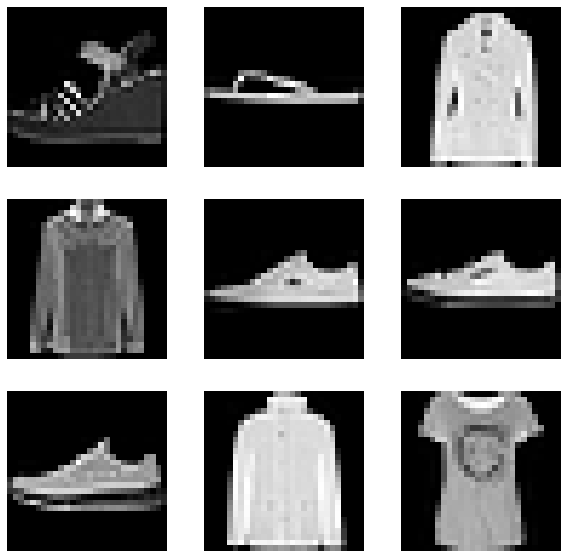

In [ ]:
#visualize the training data 
figure = plt.figure(figsize=(10,10))
rows,cols = 3,3
for i in range(1,rows * cols + 1):
  sample_idx = torch.randint(len(train_data),size=(1,)).item()
  img,label = train_data[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.axis('off')
#  plt.title(labels_map[label])

In [ ]:
#Build the neural network model 
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.layers_relu_stack = nn.Sequential(
        nn.Linear(28 *28, 512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )
  def forward(self,x):
    x = self.flatten(x)
    logits = self.layers_relu_stack(x)
    return logits

In [ ]:
#Create an instance of our model
model = NeuralNetwork().to(device) #copy the computation graph to the GPU

In [ ]:
import torch
from torch import nn
from torch.utils.data import dataloader
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision.transforms import Lambda,ToTensor
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
#Load the data
train_dataset = datasets.FashionMNIST(
    root="data",
    download = True, 
    train = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y:torch.zeros(10,dtype= torch.float).scatter_(0, torch.tensor(10), value = 1)),
)

In [ ]:
test_dataset =  datasets.FashionMNIST( 
    root = "data",
    download = True, 
    train =True,
    transform = ToTensor(),
    target_transform =  Lambda(lambda y:torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(10), value = 1))
)

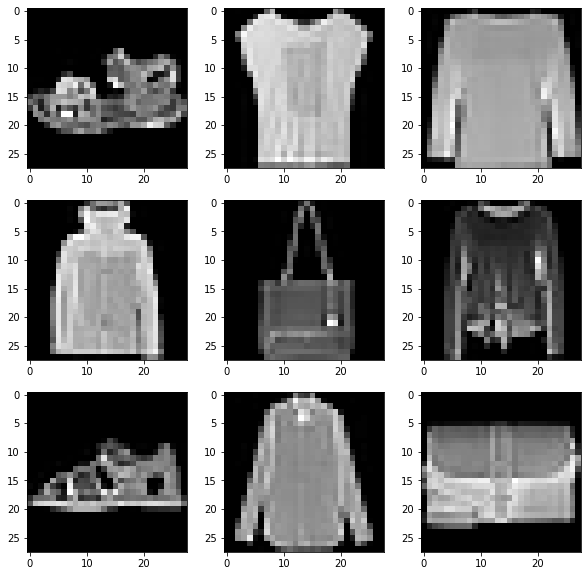

In [ ]:
#Visualize the data before proceeding to build the network 
figure =  plt.figure(figsize = (10,10))
rows, cols = 3,3
for i in range(1,rows * cols + 1):
  sample_idx =  torch.randint(len(train_data), size= (1,)).item()
  images, labels = train_data[sample_idx]  
  figure.add_subplot(rows,cols, i )
  plt.imshow(images.squeeze(),cmap='gray')

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.layers_relu = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
        )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.layers_relu(x)
    return logits

In [ ]:
model = NeuralNetwork().to(device)

In [ ]:
x = torch.randn(1,28,28, device = device)
logits = model(x)
pred_prob = nn.Softmax(dim=1)(logits)
y_pred = pred_prob.argmax(1)

In [ ]:
y_pred

tensor([1])

In [ ]:
!pip install 'fastapi[all]'

     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 10.9 MB 19.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 
     |████████████████████████████████| 596 kB 61.1 MB/s 
     |████████████████████████████████| 253 kB 30.6 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 80 kB 2.3 MB/s 
     |████████████████████████████████| 269 kB 53.5 MB/s 
     |████████████████████████████████| 58 kB 5.2 MB/s 
     |████████████████████████████████| 406 kB 50.6 MB/s 
     |████████████████████████████████| 112 kB 41.2 MB/s 
     |████████████████████████████████| 3.8 MB 39.1 MB/s 
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=f4ec3f1f9e265167a5515e4160108a5c4d239427d7536fc9bda0ef35cb8dc3ac
  Stored in directory: /root/.c

In [ ]:
from fastapi import FastAPI

In [ ]:
app = FastAPI()

In [ ]:
@app.get('/')
async def root():
  return {"Message":"Hello world"}

In [12]:
import torch
from torch import nn
from torch.utils.data import  Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [14]:
train_data = datasets.FashionMNIST(
    root = "data",
    download = True,
    train = True,
    transform = ToTensor(),
    target_transform= Lambda(lambda y: torch.zeros(10,dtype=torch.float).scatter_(0, torch.tensor(y), value = 1))
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [18]:
test_data = datasets.FashionMNIST(
    root = "data", 
    download = True,
    train = False, 
    transform = ToTensor(),
    target_transform = Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0,torch.tensor(y), value=1)))


In [20]:
#These are the classes
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

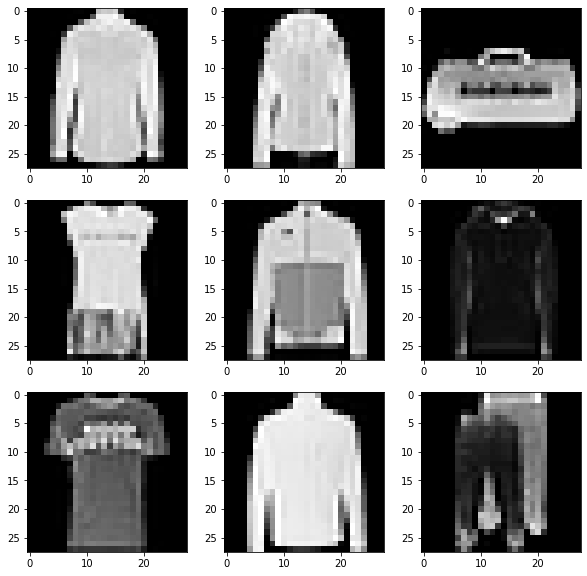

In [31]:
figure = plt.figure(figsize=(10,10))
cols,rows = 3,3
for i in range(1,cols * rows + 1):
  simple_idx = torch.randint(len(train_data), size=(1,)).item()
  images, labels = train_data[simple_idx]
  figure.add_subplot(rows,cols, i)
  plt.imshow(images.squeeze(),cmap='gray')
  #plt.xlabel(labels_map[labels[i]])

In [37]:
#We can now build the network
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.layers_relu_stack = nn.Sequential(
        nn.Linear(28 * 28, 512), #First layer of our network which contains the size of the input images and nodes to be passed to the next hidden layer
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )
  def forward(self,x):
    x = self.flatten(x)
    logits = self.layers_relu_stack(x)
    return logits

In [38]:
#We create an instance of the model
model = NeuralNetwork().to(device)

In [43]:
x = torch.rand(1,28,28, device = device) #Inputs to our model
logits = model(x) #use the model instance to make predictions from our inputs 
pred_probab = nn.Softmax(dim = 1)(logits) #Use the softmax to create a probability distribution from the output layer/vector all the values in this distribution will sum up to one
y_pred = pred_probab.argmax(1) #Here we get maximum argument from our probability distribution and treat it as our model's prediction

In [17]:
#Visualize the data before building the network


In [ ]:
#We create an instance of the computational graph we just created
model = NeuralNetwork().to(device) #Create an instance of the model and then pass it to our GPU incase its available

In [ ]:
x = torch.randn(1,28,28 , device = device)
logits =  model(x)

TypeError: ignored